# Matplotlib

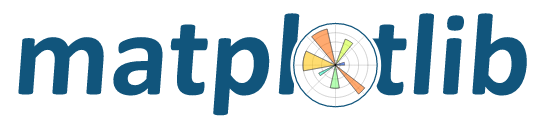

> 수정 2022.11

Matplot lib 세부 튜토리얼

> - [Matplotlib Tutorial - 파이썬으로 데이터 시각화하기, Wikidoc](https://wikidocs.net/book/5011)
> - https://wikidocs.net/92089
> - 효과적으로 matplotlib사용하기 [링크](http://pbpython.com/effective-matplotlib.html)
> - Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib [갤러리](http://matplotlib.org/gallery.html)를 방문하세요.
> - 데이터 사이언스 스쿨의 Matplotlib [소개](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)

## 소개
Matplotlib는 `파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지`입니다.

주피터(Jupyter) 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 합니다.(지금은 내장이 되어 있어서 괜찮음!)
```
%matplotlib inline
```

Plot 의 구조

Matplotlib의 그림은 Figure 객체, Axes 객체, Axis 객체 등으로 구성되어 있습니다. Figure 객체는 한 개 이상의 Axes 객체를 포함하고 Axes 객체는 다시 두 개 이상의 Axis 객체를 포함합니다. 말로 하면 이해하기 힘드니 그림으로 보겠습니다.(화면에 나타나는게 figure, 그걸 축들이 구성하고 있음)

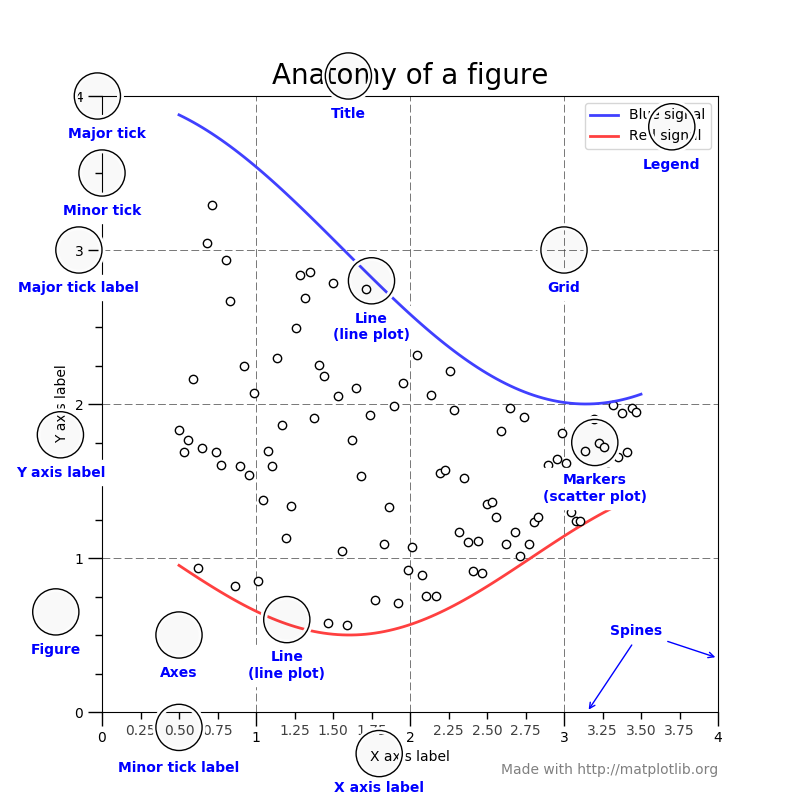

## 설치

```sh
pip install -U pip
pip install -U matplotlib
```

conda 설치

```sh
conda install -y matplotlib
```


In [ ]:
! pip install matplotlib seaborn

# 주요 설치 정보

    Mac이나 Windows에서 확인 

## 시각화 모듈 : matplotlib, seaborn

In [2]:

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.6.2
설치위치:  C:\Users\User\.venv\Second_Day\lib\site-packages\matplotlib\__init__.py
설정:  C:\Users\User\.matplotlib
캐시:  C:\Users\User\.matplotlib


In [3]:
import seaborn

print ('버전: ', seaborn.__version__)
print ('설치위치: ',seaborn.__file__)

버전:  0.12.1
설치위치:  C:\Users\User\.venv\Second_Day\lib\site-packages\seaborn\__init__.py


### 그리드와 그래프 사이즈 지정

In [4]:
# 관용적으로 이렇게 import함
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

### 한글 폰트 전체 반영 

Text(0.5, 1.0, '한글 타이틀...')

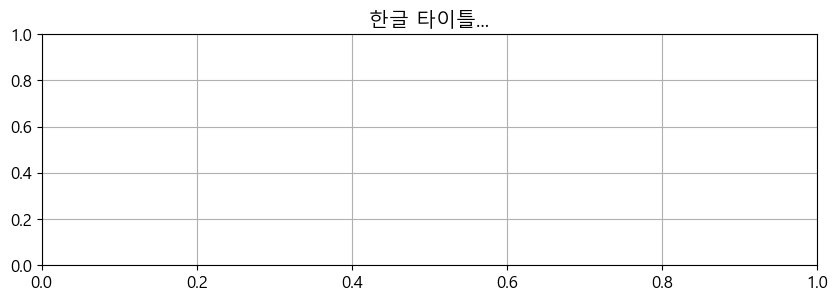

In [5]:
import matplotlib.font_manager as fm

# 전역 폰트 설정 사용 - 보통 외부 폰트 설정할 때 이렇게!
font_path = 'C:/Windows/Fonts/Malgun.ttf'
font_props = fm.FontProperties(fname=font_path, size=18)
fontname = font_props.get_name()
# fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름! >> 이렇게 한줄로도 가능!
plt.rcParams['axes.unicode_minus'] = False
# 한글 쓸 때는 이렇게 위에 걸 기본으로 해줌!!!!!


# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
# plt.rcParams['axes.unicode_minus'] = False # 위에 써줌
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

# 1. 그래프 기본  알아보기

### 시본에 있는 팁에 대한 데이터를 로드하기

       시본 내의 데이터를 로딩하면 pandas의 데이터프레임으로 처리함 

In [6]:
import seaborn as sns

###  제공하는 데이터를 로딩 : load_dataset 함수 이용

In [8]:
sns.get_dataset_names() # 데이터 샘플

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
tips = sns.load_dataset("tips")  # 데이터셋을 load해줌. 가져와줌.

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.info() # groupby 되어있네!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
tips.groupby(['sex', 'day']).sum() # 성별로, 요일별로 그룹핑을 해서 합계를 알려줌 >> 주말에 남자들이 tip많이 받음, 여자들은 주말에도 그렇게 많지는x

C:\Users\User\AppData\Local\Temp\ipykernel_4340\1301337729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['sex', 'day']).sum() # 성별로, 요일별로 그룹핑을 해서


total_bill     tip  size
sex    day                           
Male   Thur      561.44   89.41    73
       Fri       198.57   26.93    21
       Sat      1227.35  181.95   156
       Sun      1269.46  186.78   163
Female Thur      534.89   82.42    79
       Fri       127.31   25.03    19
       Sat       551.05   78.45    63
       Sun       357.70   60.61    53

# 1. 그래프 구조 알기 

### 그래프가 들어갈 장소를 만들기

In [13]:
fig = plt.figure()

<Figure size 1000x300 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(500,500)) # 아래는 픽셀사이즈라서  50000x50000

In [15]:
fig = plt.figure(figsize=(20,20)) 

<Figure size 50000x50000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [22]:
fig = plt.figure(figsize=(10,10)) 

<Figure size 1000x1000 with 0 Axes>

In [ ]:
fig.dpi # 해상도? 디폴트값이 나옴

### 그래프를 그릴 세부 위치 만들기

In [25]:
axes1 = fig.add_subplot(2,2,1) # nrows, ncols, index >> figure라는 공간에 2x2 4개의 그래프를 넣고, 인덱싱함

### 히스토그램 그리기

In [26]:
axes1.hist(tips['total_bill'], bins=10)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

### 그래프 확인하기 

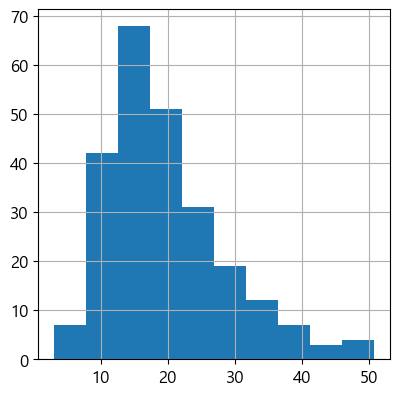

In [27]:
fig # plt.show() >> show() 그래프 보여주는 거인듯

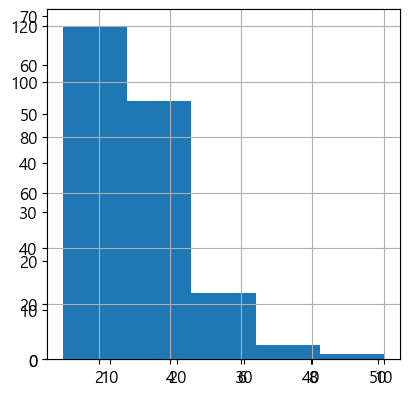

In [28]:
axes1 = fig.add_subplot(2,2,1) # nrows, ncols, index >> figure라는 공간에 2x2 4개의 그래프를 넣고, 인덱싱함
axes1.hist(tips['tip'], bins=5)
fig

### 스캐터 그래프 그리기

In [29]:
axes1 = fig.add_subplot(2,2,2) # 2번 인덱스에 새로운 데이터를 넣었다고.?
axes1.scatter(tips['total_bill'], tips['tip']) # scatter 산포도? 데이터 포인트 위치가 나옴

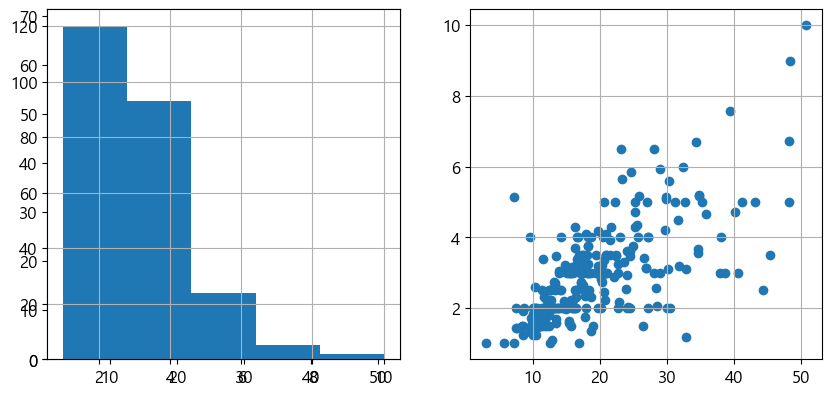

In [30]:
fig

### 선 그래프 그리기 

In [31]:
axes1 = fig.add_subplot(2,2,3)
axes1.plot(tips['total_bill'], tips['tip']) # 기본 그래프, line

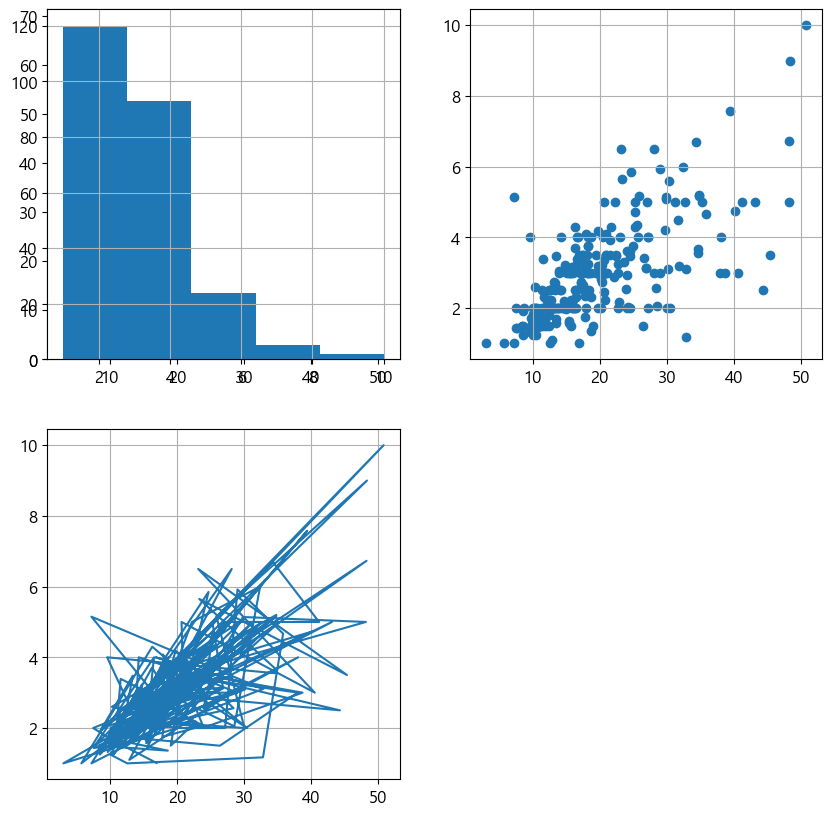

In [32]:
fig

### 상자 그래프 그리기

In [33]:
tips[ tips['sex'] == 'Female']['tip']

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [34]:
axes1 = fig.add_subplot(2,2,4)
axes1.boxplot([tips[ tips['sex'] == 'Female']['tip'],
              tips[ tips['sex'] == 'Male']['tip']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1d11d9100>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1d11d9640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1d11c8e20>,
 'medians': [<matplotlib.lines.Line2D at 0x1c1d11d9b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c1d11d9e20>,
 'means': []}

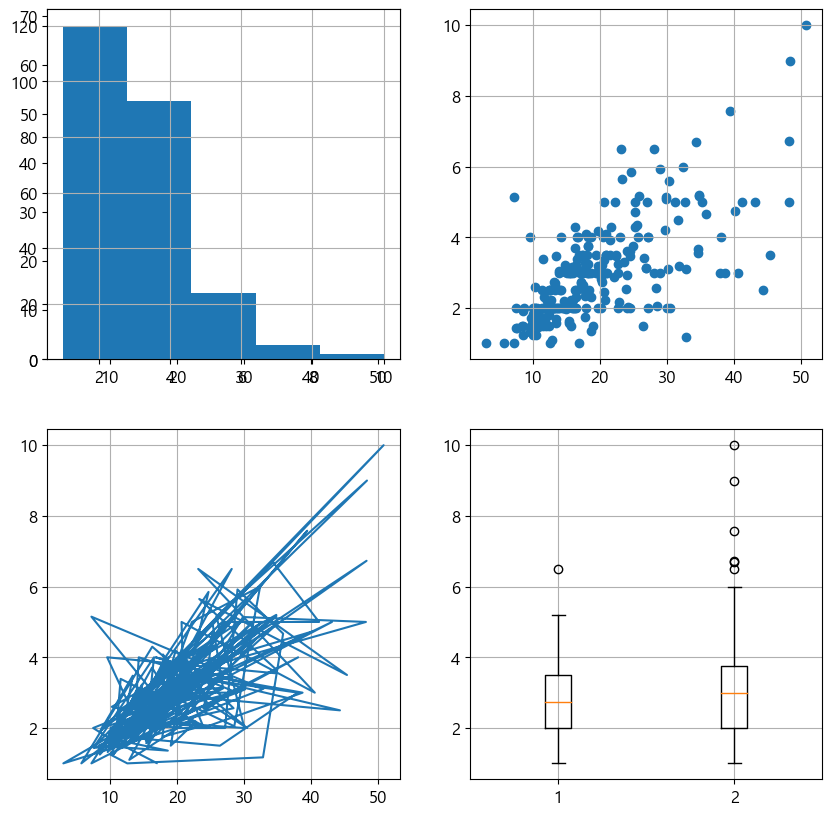

In [35]:
fig

### 그래프를 동시에 나누기 및 간격 조정하기

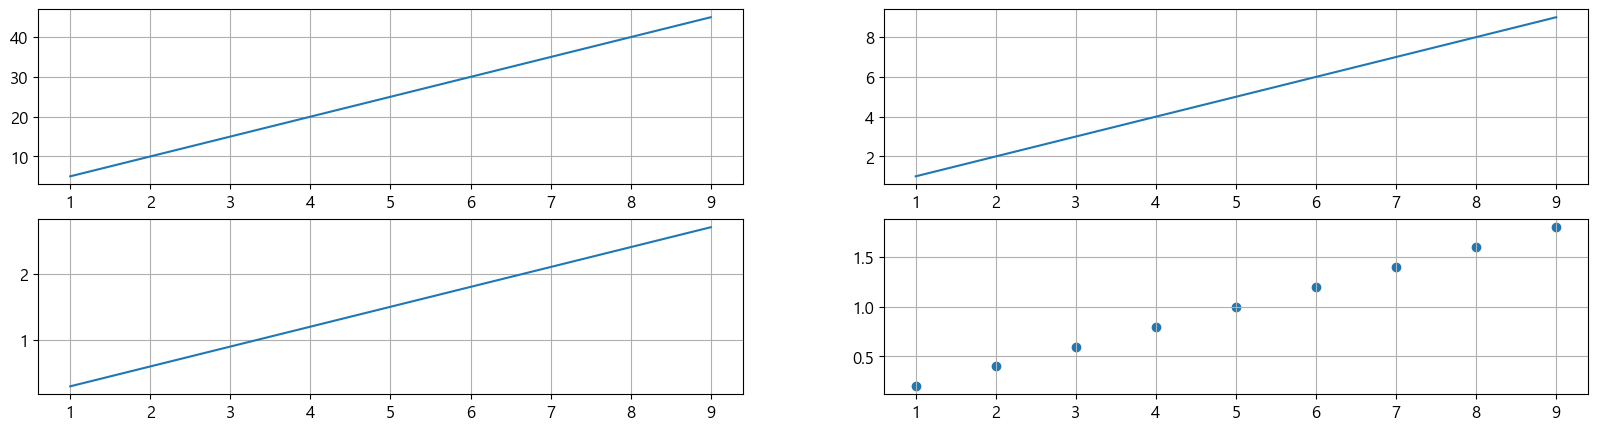

In [38]:
import numpy as np

# 데이터 준비
x = np.arange(1,10)
y1 = x*5
y2 = x*1
y3 = x*0.3
y4 = x*0.2

# 그래프
plt.figure(figsize=(20,5))
plt.subplot(2,2,1) # 한 공간에 여러 그래프 / 하나씩 추가하는건 add_subplot(우리가 공부하려고 하나씩 추가하며 봄)
plt.plot(x,y1)
plt.subplot(2,2,2)
plt.plot(x,y2)
plt.subplot(2,2,3)
plt.plot(x,y3)
plt.subplot(2,2,4)
# plt.plot(x,y4)
plt.scatter(x, y4)

## 간격처리
# plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

plt.show()


# 2. fig 객체를 이용해서 출력하기

     doitpandas  참조

## 두번째 데이터를 로딩하기

In [ ]:
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 

In [ ]:
type(anscombe)

In [ ]:
anscombe.head()

### 칼럼 정보 확인

In [ ]:
anscombe.columns

### 논리 검색을 위해 특정 행정보만 추출 

In [ ]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

### 하나의 figure에 4 개의 그래프를 표시

In [ ]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

### 실제 그래프를 그리기 fig 객체로 출력 가능

      선그래프이지만 marker를 지정해서 점으로 출력함

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

### 각각의 그래프에 제목을 출력

In [ ]:
axes1.set_title("dataset_1") 
axes2.set_title("dataset_2")
axes3.set_title("dataset_3") 
axes4.set_title("dataset_4")

fig

### 전체 제목을 표시

In [ ]:
fig.suptitle("Anscombe Data")

fig

### 그래프 내의 간격을 자동으로 조정

In [ ]:
fig.tight_layout()

fig

# 3.  점 그래프에서 크기와 색상을 조정하기

      doitpandas  참조
    

In [39]:
tips.head() # 데이터를 분류형으로 만들기 위해서 문자화된 데이터를 숫자화하자!(머신러닝, 딥러닝에 문자형 데이터는 못들어감!)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 함수를 지정해서 내부 칼럼 추가
목적: 문자(분류, 클래스, 범주, 범례 분류) -> 숫자로 인코딩!
- one-hot encoding

In [40]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

### apply 함수를 이용해서 행의 값들을 변경하고 새로운 열에 추가하기

In [42]:
tips['sex'].apply(recode_sex)

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [43]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [ ]:
# lambda 로 구현해 보자.

lambda sex: 0 if sex == 'female' else 1

In [45]:
#tips['sex'].apply( lambda sex:   ... )

tips['sex'].apply(lambda sex: 0 if sex == 'female' else 1)

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: sex, Length: 244, dtype: int64

## 그래프 그리기

Text(0, 0.5, 'Tip')

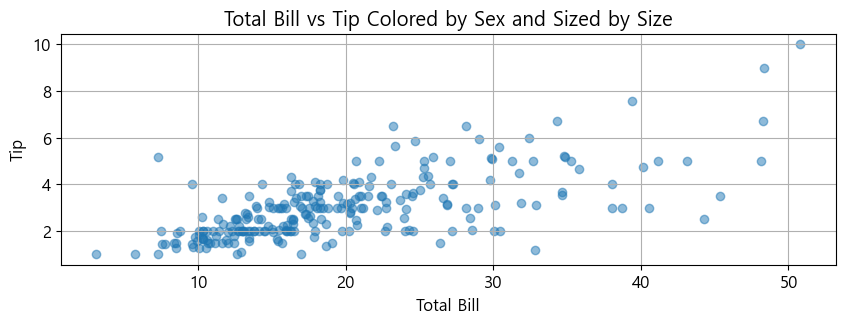

In [46]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(           # 분포도
    x=tips['total_bill'], 
    y=tips['tip'],    
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 


### 점 그래프에 대한 함수 기능 조회

In [ ]:
help(axes1.scatter)

### 마커사이즈를 s에 추가

Text(0, 0.5, 'Tip')

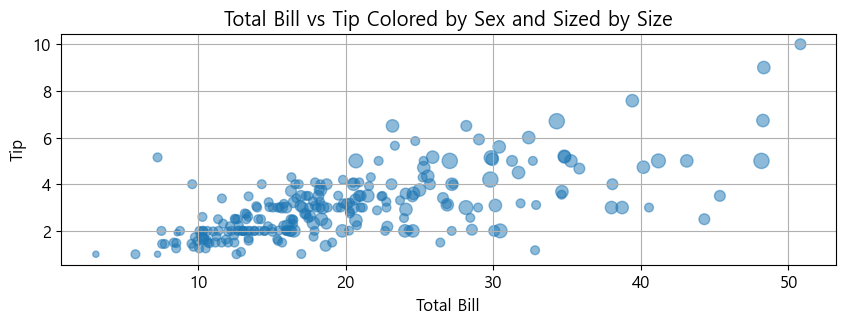

In [47]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 20,    
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

### 칼라를 c에 추가

Text(0, 0.5, 'Tip')

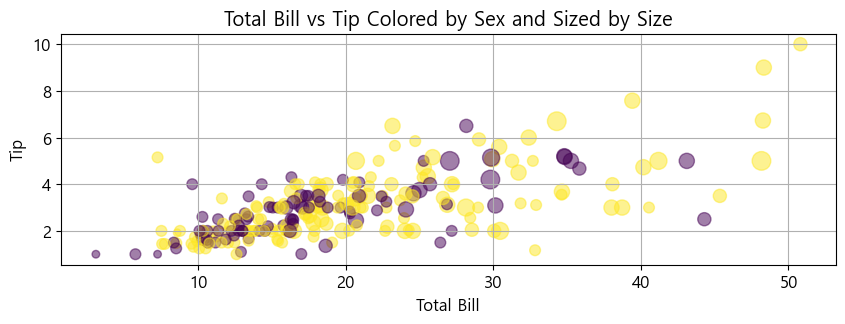

In [48]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 30, # 크기
    c=tips['sex_color'], # 남녀구분
    alpha=0.5) # 투명도

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

Text(0, 0.5, 'Tip')

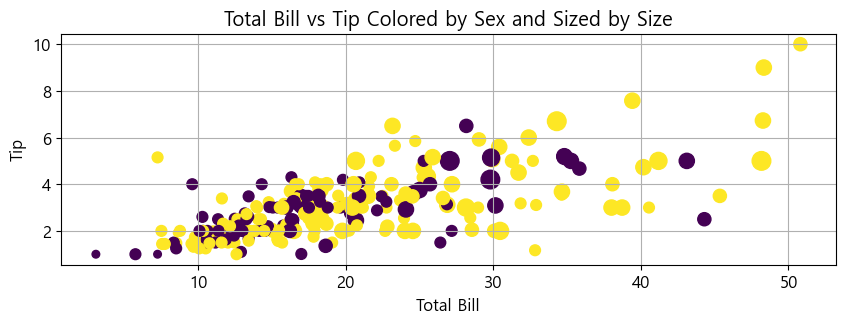

In [49]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 30, # 크기
    c=tips['sex_color'], # 남녀구분
    ) # 투명도x

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

<공부하기>
- 색상 이론
- 이미지 구조 

# 4. 그래프 꾸미기

### 임의의 배열을 만들어서 이 값들이 누적값 처리  

In [50]:
import numpy as np
data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -90, -155, -228, -222, -184, -139,  -78,  -52,  -80, -139, -106,
       -143,  -74,  -57, -117, -172, -268, -181, -131, -209, -288, -243,
       -177, -126,  -30,   -2,  -41, -131, -218, -175, -150, -222, -175,
       -237, -274, -244, -285, -382, -441, -494, -525, -514, -466, -428,
       -420, -458, -479, -437, -388, -417])

### 레이블과 제목을 처리하기 , 한글 폰트 처리 추가

In [51]:
font_path   # 앞서 선언한 한글 폰트 경로

'C:/Windows/Fonts/Malgun.ttf'

In [52]:
%ls C:\Windows\Fonts\

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6C61-529B

 C:\Windows\Fonts 디렉터리

2019-12-07  오후 06:08            10,976 8514fix.fon
2019-12-07  오후 06:08            10,976 8514fixe.fon
2019-12-07  오후 06:08            11,520 8514fixg.fon
2019-12-07  오후 06:08            10,976 8514fixr.fon
2019-12-07  오후 06:08            11,488 8514fixt.fon
2019-12-07  오후 06:08            12,288 8514oem.fon
2019-12-07  오후 06:08            13,248 8514oeme.fon
2019-12-07  오후 06:08            12,800 8514oemg.fon
2019-12-07  오후 06:08            13,200 8514oemr.fon
2019-12-07  오후 06:08            12,720 8514oemt.fon
2019-12-07  오후 06:08             9,280 8514sys.fon
2019-12-07  오후 06:08             9,504 8514syse.fon
2019-12-07  오후 06:08             9,856 8514sysg.fon
2019-12-07  오후 06:08            10,064 8514sysr.fon
2019-12-07  오후 06:08             9,792 8514syst.fon
2019-12-07  오후 06:08            12,304 85775.fon
2019-12-07  오후 06:08            12,256 85855.fon
2019-12-07  오후 06:08            12,336 85f1255.fon
2019

In [ ]:
# fontprop = fm.FontProperties(fname='C:/Windows/Fonts/~~') # 위에는 전역 폰트, 여기서는 여기서만 쓸수 있는 한글폰트 지정...?

plt.ylabel('가격', fontproperties=fontprop)
plt.title('가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

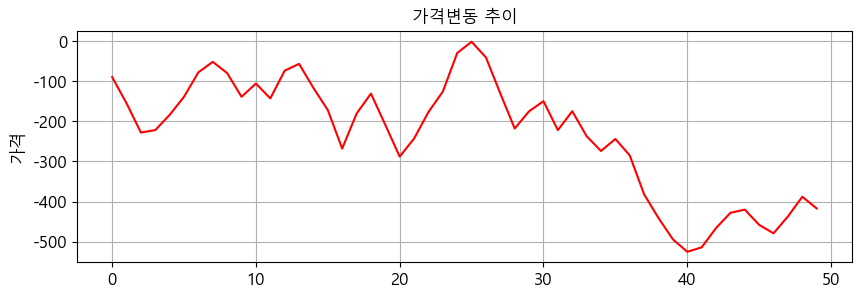

In [53]:
fontprop = fm.FontProperties(fname=font_path) # 위에는 전역 폰트, 여기서는 여기서만 쓸수 있는 한글폰트 지정...?

plt.ylabel('가격', fontproperties=fontprop)
plt.xlabel('기간', fontproperties=fontprop)
plt.title('가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

AttributeError: module 'numpy' has no attribute 'range'

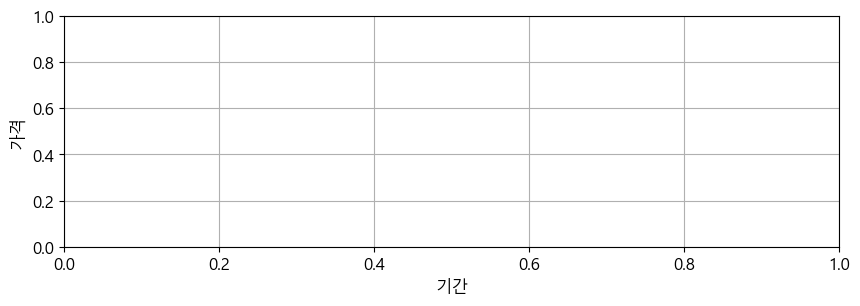

In [54]:
fontprop = fm.FontProperties(fname=font_path) # 위에는 전역 폰트, 여기서는 여기서만 쓸수 있는 한글폰트 지정...?

plt.ylabel('가격', fontproperties=fontprop)
plt.xlabel('기간', fontproperties=fontprop)
plt.xticks(np.range(10,150)) # 단위, 범위
plt.title('가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

### 다른 한글을 직접 제목에 넣어 처리하기

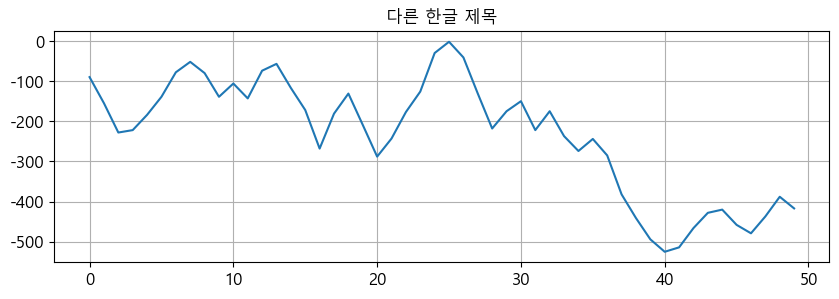

In [55]:

plt.title('다른 한글 제목', fontproperties=fontprop)
plt.plot(data)
plt.show()

### 범례 처리하기 

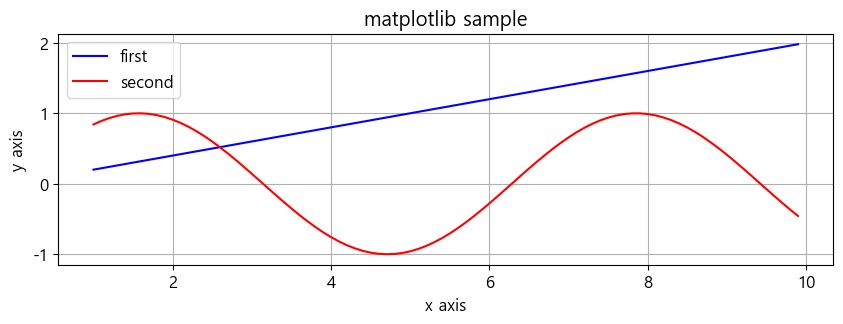

In [57]:
x = np.arange(1,10,0.1)
y = x*0.2
y2 = np.sin(x)

plt.plot(x,y,'b', label='first')
plt.plot(x,y2,'r', label='second')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend() # 범례 - legend
plt.show()


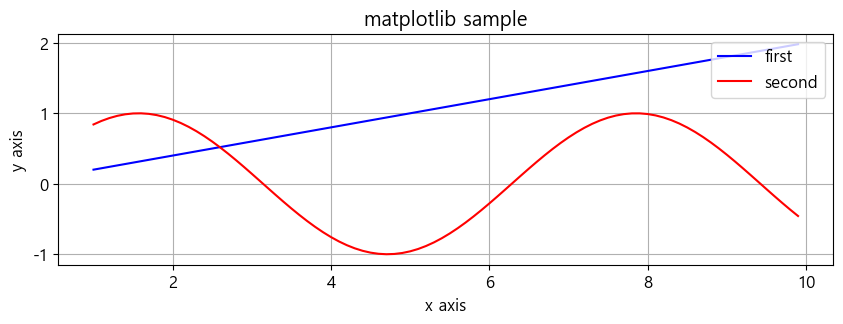

In [56]:
x = np.arange(1,10,0.1)
y = x*0.2
y2 = np.sin(x)

plt.plot(x,y,'b', label='first')
plt.plot(x,y2,'r', label='second')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right') # 범례 - legend
plt.show()


In [ ]:
x = np.arange(1,10,0.1)
y = x*0.2
y2 = np.sin(x)

plt.plot(x,y,'b', label='한글라벨1')
plt.plot(x,y2,'r', label='글자라벨2')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()


### 주석달기 annotate

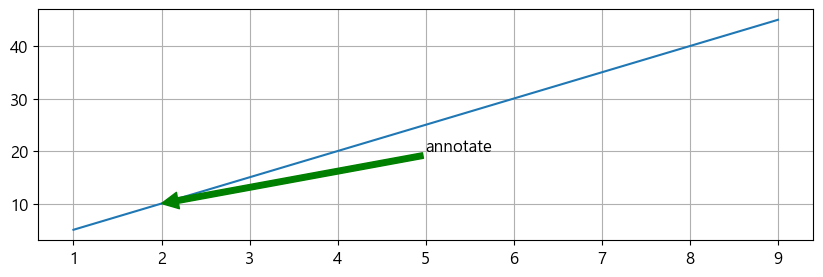

In [58]:
x = np.arange(1,10)
y = x*5

plt.plot(x,y)
plt.annotate('annotate',xy=(2,10),xytext=(5,20),arrowprops={'color':'green'}) # xy(annotate하는 곳) / xytext('annotate' 글자가 나타나는 위치)
plt.show()

### 텍스트 입력하기

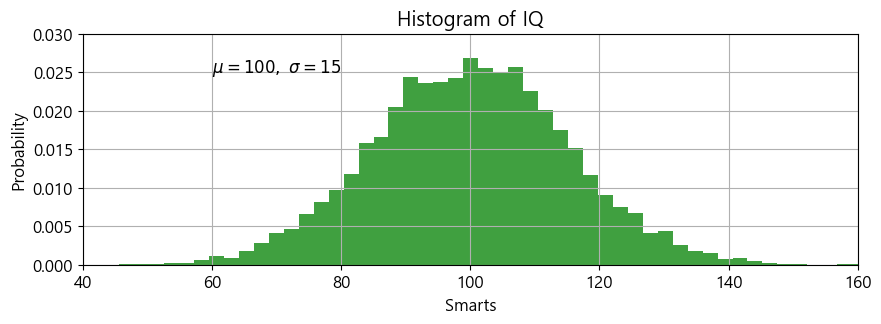

In [59]:

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# 히스토그램 만들기
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # 라텍스 쓸 수 있음!(r써줘야 라텍스로 인식함! 없으면 나오긴 하는데 그냥 문자열로 인식)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 원그래프 그리기

In [ ]:
# matplotlib 컬러맵 생성
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

def make_explode(n):
    explodes = np.zeros(n)
    explodes[0] = 0.15
    return explodes

### 박스 그래프 

In [ ]:
help(plt.boxplot)

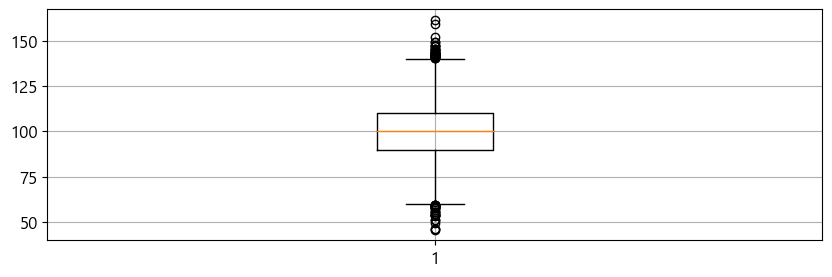

In [60]:
plt.boxplot(x)

plt.show()

### x 축에 대한 설명을 바꾸려면 박스그래프에 맞는 숫자와 매핑해서 문자열을 넣기

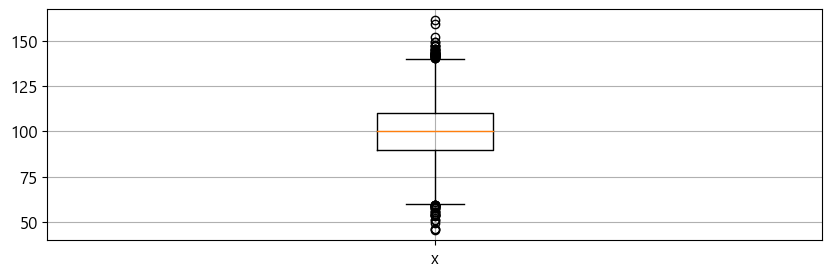

In [61]:
plt.boxplot(x)

plt.xticks([1], ['x'])
plt.show()